Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target은 로그변환하고 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640,)


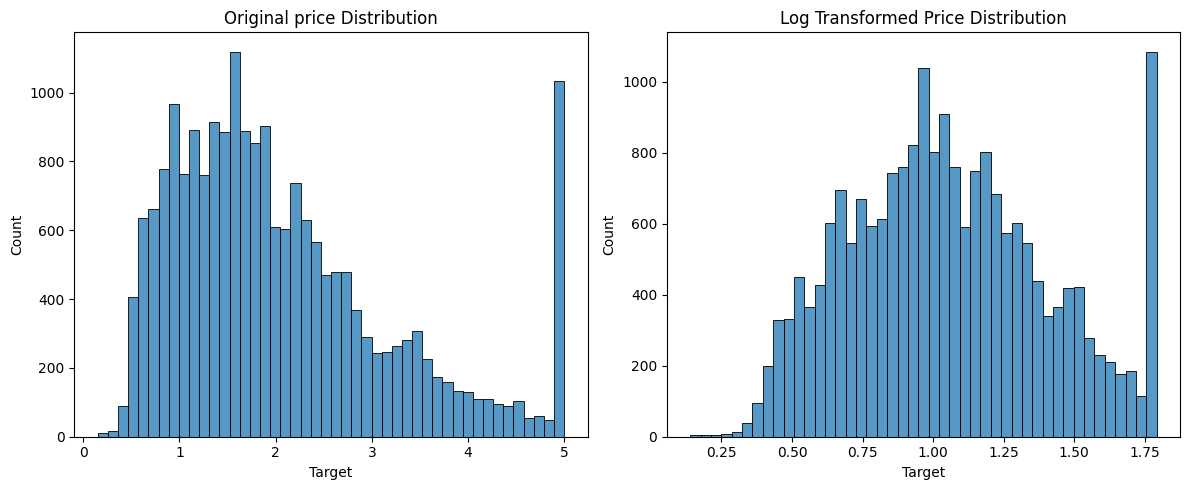

In [10]:
# histplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

sns.histplot(df['Target'], ax=axs[0])
axs[0].set_title('Original price Distribution')

y_log = np.log1p(df['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')
print(y_log.shape)
plt.tight_layout()
plt.show()

In [37]:
# Target은 로그변환하고 X 변수들을 표준화한 후 모델 학습 및 평가

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y

y_log = np.log1p(df["Target"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'Mean Squated Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squated Error: 0.0485
Mean Absolute Error: 0.1665
R^2 Score: 0.6151


In [48]:
# 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound), median, df[column]
    )
    return df

for i in df.columns:
    replace_outliers_with_median(df, i)

In [30]:
df['AveRooms'].describe()

count    20640.000000
mean         5.238561
std          1.139756
min          2.032738
25%          4.447368
50%          5.229129
75%          5.960233
max          8.469738
Name: AveRooms, dtype: float64

In [27]:
df['AveBedrms'].describe()

count    20640.000000
mean         1.048191
std          0.063783
min          0.866013
25%          1.007732
50%          1.048780
75%          1.084706
max          1.239521
Name: AveBedrms, dtype: float64

In [ ]:
y

In [49]:
df["Target"] = y

X = df.iloc[:,:-1]
y = df.iloc[:, -1]


y_log = np.log1p(df["Target"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squated Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squated Error: 0.0510
Mean Absolute Error: 0.1715
R^2 Score: 0.5957


이상치 제거후에도 에러가 더 큰것으로 보인다.

Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

In [51]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)
        


In [52]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # 오차는 적을수록 좋기 때문에 neg_mean_squared_error를 사용
    neg_mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    # 양수로 전환하기 위해 -1을 곱함
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(f'알파값 {alpha} 일때 평가 점수:')
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}\n".format(avg_rmse))

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717

알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.55  -26.568 -35.094 -85.388 -21.502]
5 folds의 개별 RMSE scores: [3.543 5.154 5.924 9.241 4.637]
5 folds의 평균 RMSE: 5.700

알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.024 -26.691 -33.148 -84.504 -21.339]
5 folds의 개별 RMSE scores: [3.467 5.166 5.757 9.193 4.619]
5 folds의 평균 RMSE: 5.641

알파값 10 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores: [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE: 5.568

알파값 100 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-13.113 -31.629 -40.949 -56.7   -18.679]
5 folds의 개별 RMSE scores: [3.621 5.624 6.399 7.53  4.322]
5 folds의 평균 RMSE: 5.499



In [57]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 교차 검증 점수 계산
    neg_mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"알파값 {alpha} 일때 평가 점수:")
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

    # 전체 데이터셋으로 모델 학습 후 회귀계수 구하기
    ridge.fit(X_data, y_target)
    coefficients = ridge.coef_

    print("회귀계수:")
    for name, coef in zip(X_data.columns, coefficients):
        print(f"{name}: {coef:.4f}")
    print("\n")

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717
회귀계수:
CRIM: -0.0651
ZN: 0.0420
INDUS: -0.0543
CHAS: 3.0838
NOX: -15.3094
RM: 4.1137
AGE: -0.0042
DIS: -1.5021
RAD: 0.0972
TAX: 0.0015
PTRATIO: -0.8228
B: 0.0084
LSTAT: -0.5159


알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.55  -26.568 -35.094 -85.388 -21.502]
5 folds의 개별 RMSE scores: [3.543 5.154 5.924 9.241 4.637]
5 folds의 평균 RMSE: 5.700
회귀계수:
CRIM: -0.0649
ZN: 0.0422
INDUS: -0.0577
CHAS: 3.0641
NOX: -14.3933
RM: 4.1182
AGE: -0.0050
DIS: -1.4882
RAD: 0.0968
TAX: 0.0014
PTRATIO: -0.8134
B: 0.0084
LSTAT: -0.5171


알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.024 -26.691 -33.148 -84.504 -21.339]
5 folds의 개별 RMSE scores: [3.467 5.166 5.757 9.193 4.619]
5 folds의 평균 RMSE: 5.641
회귀계수:
CRIM: -0.0640
ZN: 0.0432
INDUS: -0.0763
CHAS: 2.9263
NOX: -9.3524
RM: 4.1330
AGE: -0.0092
DIS: -1.4119
RAD: 0.0945
TAX: 